BlueBerry Winery's team, a start-up wine maker in Portugal, has approached our company to help them build a Wine Quality Analytics System to help them determine the quality of the wines produced based on their composition.

Like any modern start-up company, BlueBerry Winery is trying to enter the business with a good amount of analytics and research on domain knowledge. Many wine companies fail because they do not start with preliminary quality research neither on the market nor on their product. With the advancement of technology, more and more companies trust data and machine learning to come to a decision instead of expert recommendation / analysis.

From a sales and marketing perspective, it is of utmost priority to put a proper price tag for a bottle of wine so that there is no mismatch between quality and price of the product, one of the major factors contributing to 'Customer Satisfaction'.

Other factors contribute to the quality. The age of a bottle of wine, for example, plays a significant role as time changes the taste of the fruit flavours in a wine as well as reduces the acidity and tannin in a wine. As the acidity and tannin are reduced, the wine becomes rounder and smoother. The analysis should not restrict to the technical specifications but include the business / domain aspects so that it can help BlueBerry Winery make business decisions.

# Importing libraries

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Loading the data

In [92]:
red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=";")
display(red_wine.info())
display(red_wine.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


None

(1599, 12)

# Data Wrangling

### print the first 10 and the last 10 records (use head() and tail() methods)

In [93]:
display(red_wine.head(10))
display(red_wine.tail(10))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


### observe if there are missing values (use isna(), isnull())

In [94]:
display(red_wine.isna())
display(red_wine.isna().sum())

display(red_wine.isnull())
display(red_wine.isnull().sum())


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Let's now group our qualities into 3 categories: low, medium and high quality wines.

In [95]:
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
categories=['low', 'medium', 'high'])
display(red_wine.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,low


## Do the same with the white wine

In [96]:
white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=";")
display(white_wine.info())
display(white_wine.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


None

(4898, 12)

In [97]:
display(white_wine.head(10))
display(white_wine.tail(10))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4888,6.8,0.220,0.36,1.20,0.052,38.0,127.0,0.99330,3.04,0.54,9.2,5
4889,4.9,0.235,0.27,11.75,0.030,34.0,118.0,0.99540,3.07,0.50,9.4,6
4890,6.1,0.340,0.29,2.20,0.036,25.0,100.0,0.98938,3.06,0.44,11.8,6
4891,5.7,0.210,0.32,0.90,0.038,38.0,121.0,0.99074,3.24,0.46,10.6,6
4892,6.5,0.230,0.38,1.30,0.032,29.0,112.0,0.99298,3.29,0.54,9.7,5
4893,6.2,0.210,0.29,1.60,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.320,0.36,8.00,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.240,0.19,1.20,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.290,0.30,1.10,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.210,0.38,0.80,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [98]:
display(white_wine.isna())
display(white_wine.isna().sum())

display(white_wine.isnull())
display(white_wine.isnull().sum())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,False,False,False,False,False,False,False,False,False,False,False,False
4894,False,False,False,False,False,False,False,False,False,False,False,False
4895,False,False,False,False,False,False,False,False,False,False,False,False
4896,False,False,False,False,False,False,False,False,False,False,False,False


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,False,False,False,False,False,False,False,False,False,False,False,False
4894,False,False,False,False,False,False,False,False,False,False,False,False
4895,False,False,False,False,False,False,False,False,False,False,False,False
4896,False,False,False,False,False,False,False,False,False,False,False,False


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [99]:
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# Wines with a quality score of 3, 4, and 5 are low quality, score of 6 and 7 are medium quality, and score of 8 and 9 are high quality wines.
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'],
categories=['low', 'medium', 'high'])
display(white_wine.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium


### Now we want to create a third dataset, in which we have both red and white wines together.

In [100]:
# It might be useful for more complex analysis and plots, and we will use it further on to create our first Machine Learning algorithm that will be able to predict the wine type based on its composition.

all_wine = pd.concat([white_wine, red_wine])
display(all_wine.head())
display(all_wine.shape)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,medium
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,medium
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,medium
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,medium


(6497, 13)

# Exploratory Data Analysis

In [101]:
# Using the red_wine and white_wine datasets,create a table like the one below to compare Descriptive Statistics between red and white wines.

pd.concat([red_wine[['residual sugar', 'total sulfur dioxide', 'sulphates', 'alcohol', 'volatile acidity', 'quality']], 
            white_wine[['residual sugar', 'total sulfur dioxide', 'sulphates', 'alcohol', 'volatile acidity', 'quality']]], 
            axis=1, keys=["Red Wines Stats", "White Wines Stats"])


Red Wines Stats                                                          \
      residual sugar total sulfur dioxide sulphates alcohol volatile acidity   
0                1.9                 34.0      0.56     9.4             0.70   
1                2.6                 67.0      0.68     9.8             0.88   
2                2.3                 54.0      0.65     9.8             0.76   
3                1.9                 60.0      0.58     9.8             0.28   
4                1.9                 34.0      0.56     9.4             0.70   
...              ...                  ...       ...     ...              ...   
4893             NaN                  NaN       NaN     NaN              NaN   
4894             NaN                  NaN       NaN     NaN              NaN   
4895             NaN                  NaN       NaN     NaN              NaN   
4896             NaN                  NaN       NaN     NaN              NaN   
4897             NaN                  NaN       NaN     NaN              NaN   

             White Wines Stats                                         \
     quality    residual sugar total sulfur dioxide sulphates alcohol   
0        5.0              20.7                170.0      0.45     8.8   
1        5.0               1.6                132.0      0.49     9.5   
2        5.0               6.9                 97.0      0.44    10.1   
3        6.0               8.5                186.0      0.40     9.9   
4        5.0               8.5                186.0      0.40     9.9   
...      ...               ...                  ...       ...     ...   
4893     NaN               1.6                 92.0      0.50    11.2   
4894     NaN               8.0                168.0      0.46     9.6   
4895     NaN               1.2                111.0      0.46     9.4   
4896     NaN               1.1                110.0      0.38    12.8   
4897     NaN               0.8                 98.0      0.32    11.8   

                               
     volatile acidity quality  
0                0.27       6  
1                0.30       6  
2                0.28       6  
3                0.23       6  
4                0.23       6  
...               ...     ...  
4893             0.21       6  
4894             0.32       5  
4895             0.24       6  
4896             0.29       7  
4897             0.21       6  

[4898 rows x 12 columns]

### The first plot you should do is a pie chart, showing the quantity of red wines compared to the quantity of white wines.

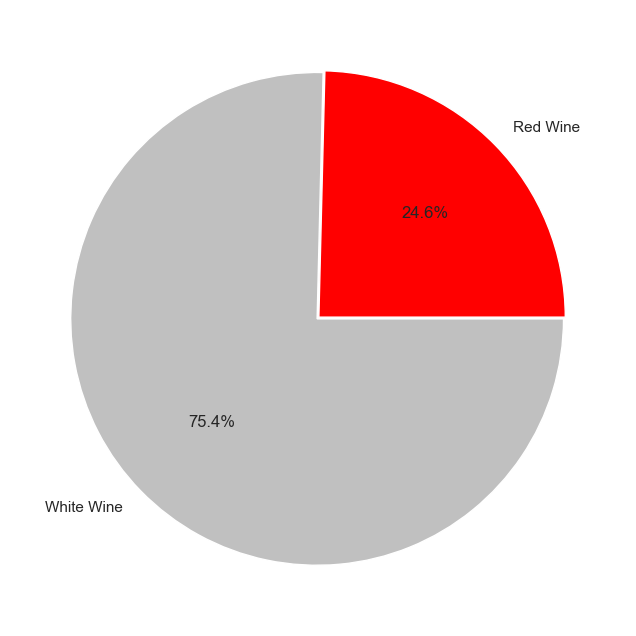

In [102]:
a = red_wine.shape[0]
b = white_wine.shape[0]
c = a + b
ratio = [a/c, b/c]
labels = ['Red Wine', 'White Wine']
colors = ['red', 'silver']
explode = [0.005, 0.005]

plt.pie(ratio, labels=labels, autopct='%.1f%%', colors = colors, explode=explode)
plt.show()

## Now create a plot to show the distribution of qualities. It should look similar to the one below

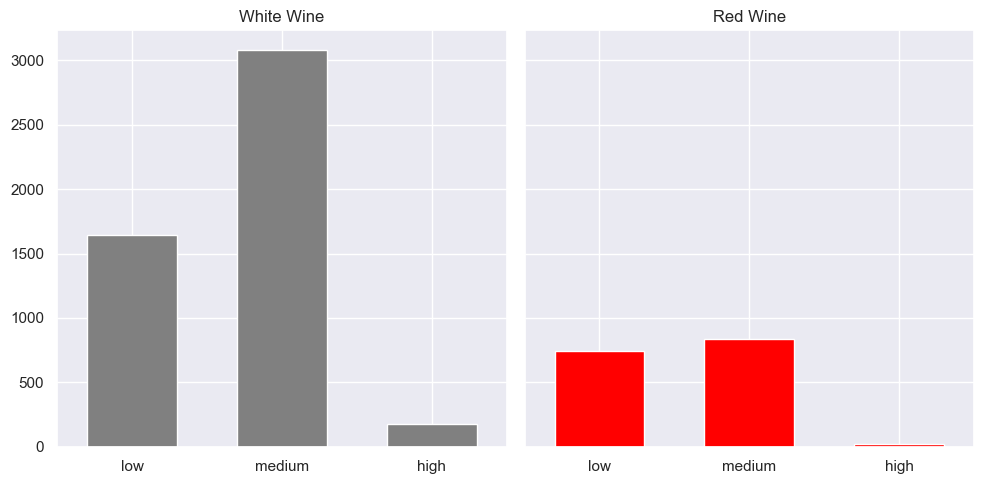

In [103]:
fig, axs = plt.subplots(1, 2, sharey="row", tight_layout=True, figsize=(10, 5))

count_quality_red = red_wine['quality_label']
count_quality_white = white_wine['quality_label']

quality_order = ['low', 'medium', 'high']
count_quality_white = count_quality_white.reindex(quality_order)
count_quality_red = count_quality_red.reindex(quality_order)

axs[0].set_title("White Wine")
axs[1].set_title("Red Wine")

data_white = white_wine['quality_label'].map({'low': 0, 'medium': 1, 'high': 2})
data_red = red_wine['quality_label'].map({'low': 0, 'medium': 1, 'high': 2})

axs[0].hist(data_white, color='grey', bins=np.arange(4) - 0.5, align='mid', rwidth=0.6)
axs[1].hist(data_red, color='red', bins=np.arange(4) - 0.5, align='mid', rwidth=0.6)

axs[0].set_xticks(np.arange(len(quality_order)))
axs[0].set_xticklabels(quality_order)

axs[1].set_xticks(np.arange(len(quality_order)))
axs[1].set_xticklabels(quality_order)

axs[0].set_xlim(left=-0.5, right=len(quality_order) - 0.5)
axs[1].set_xlim(left=-0.5, right=len(quality_order) - 0.5)

plt.show()

## Now try to compare the quality with some other features. For example, try reproducing the following box plot.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.fram

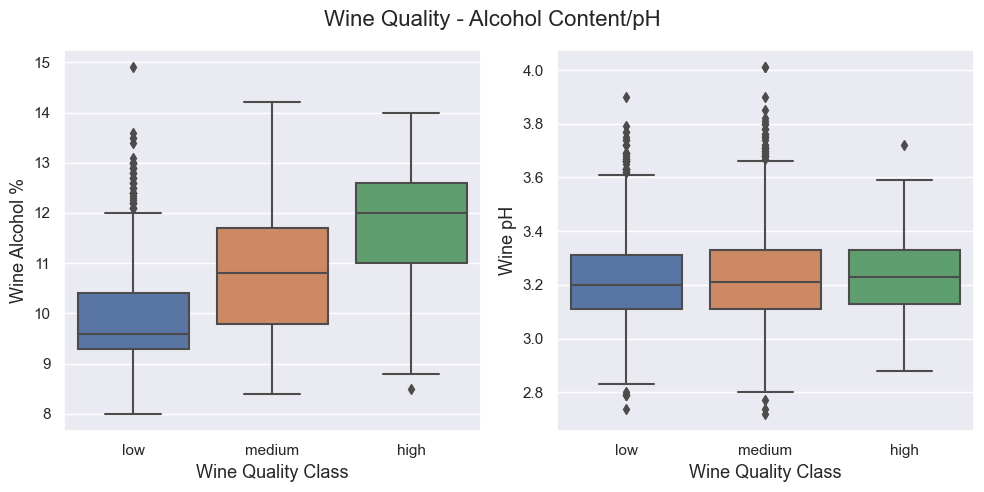

In [104]:
all_wine = pd.concat([white_wine, red_wine])

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)  
sns.boxplot(x="quality_label", y="alcohol", data=all_wine)
plt.xlabel("Wine Quality Class",fontsize =13)
plt.ylabel("Wine Alcohol %", fontsize =13)

plt.subplot(1, 2, 2)  
sns.boxplot(x="quality_label", y="pH", data=all_wine)
plt.xlabel("Wine Quality Class",fontsize =13)
plt.ylabel("Wine pH", fontsize =13)

plt.tight_layout()  
plt.subplots_adjust(top=0.9)
plt.suptitle("Wine Quality - Alcohol Content/pH", fontsize=16)
plt.show()

# Univariate Analysis

### Univariate analysis involves analyzing data such that at any instance of analysis you are only dealing with one variable or feature

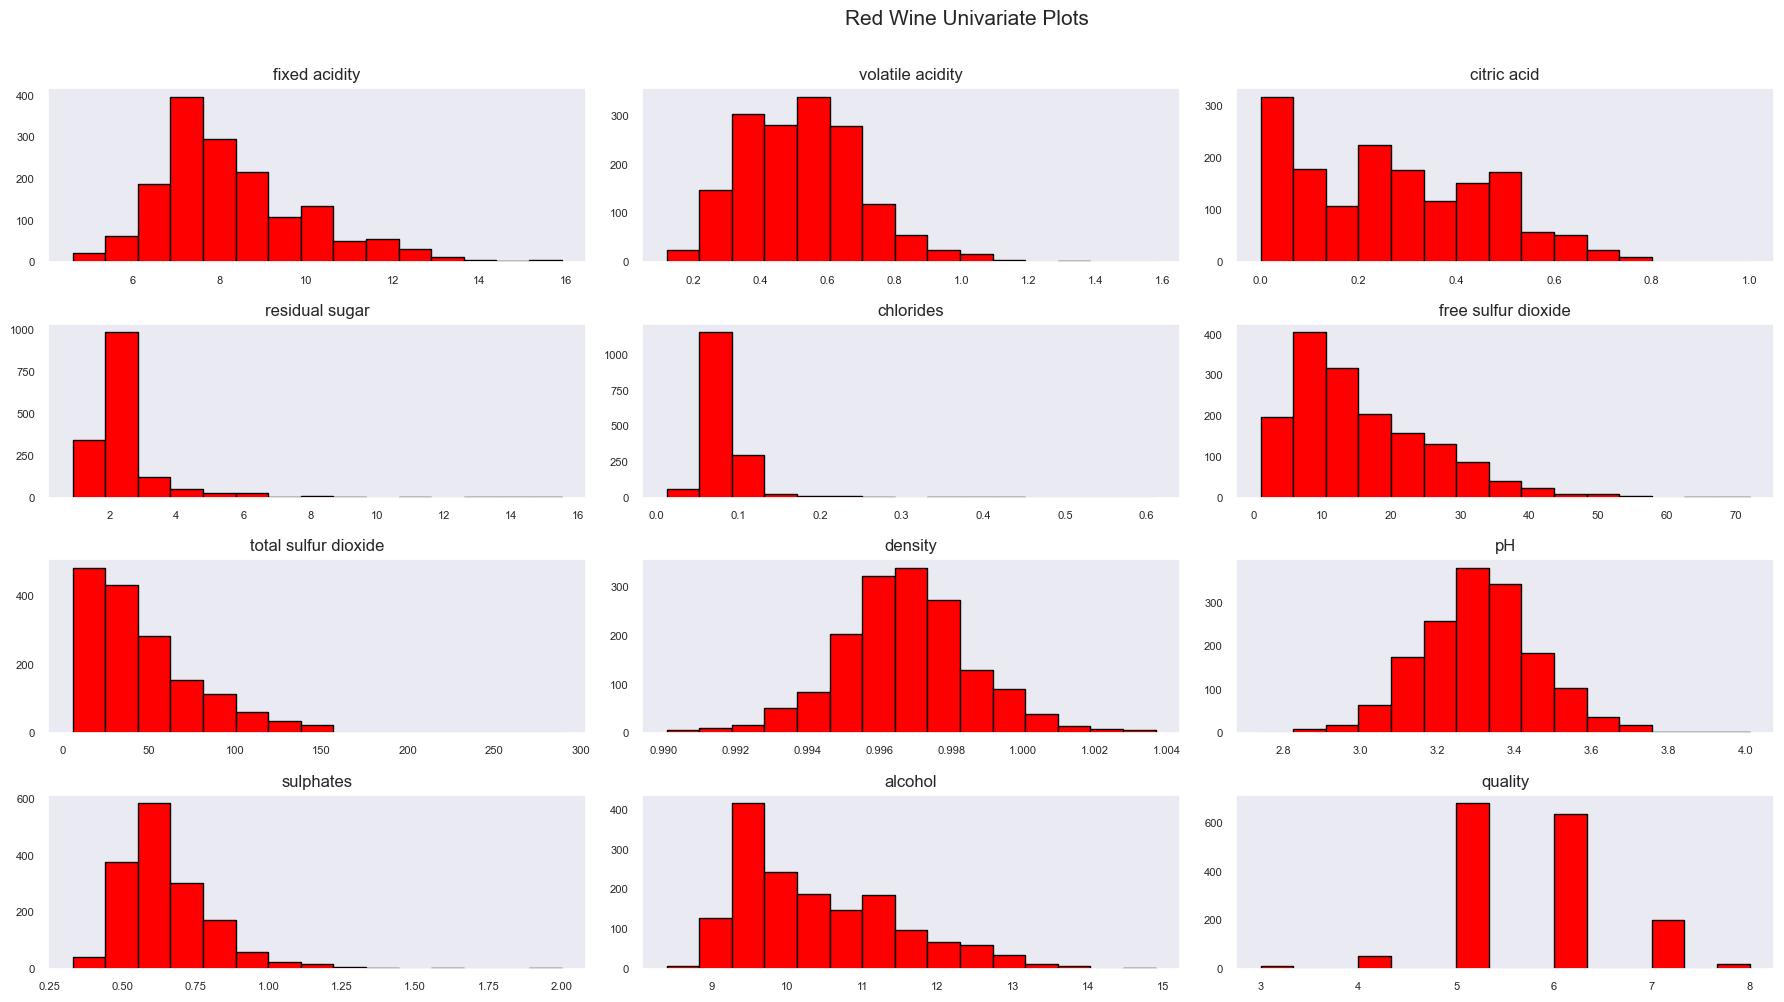

In [105]:
red_wine.hist(bins=15, color='red', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 1.2, 1.2))
rt = plt.suptitle('Red Wine Univariate Plots', x=0.65, y=1.25, fontsize=15)

### Try to do the same for white wine.

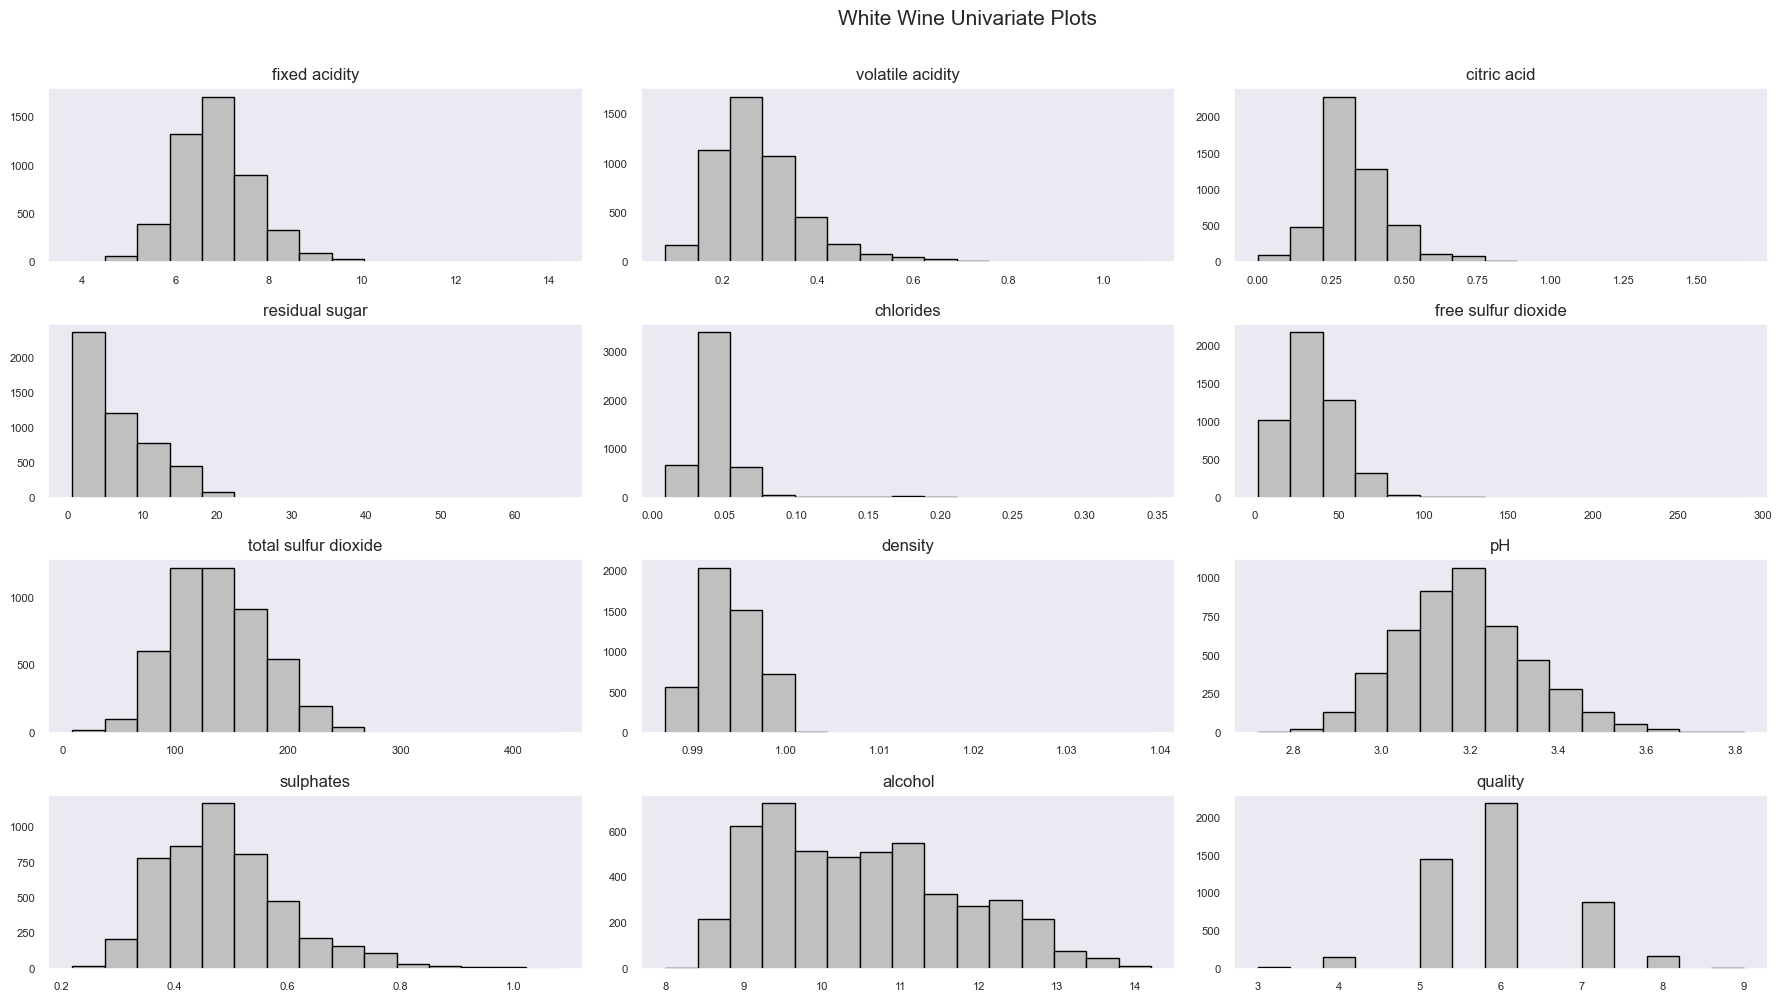

In [106]:
white_wine.hist(bins=15, color='silver', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 1.2, 1.2))
rt = plt.suptitle('White Wine Univariate Plots', x=0.65, y=1.25, fontsize=15)

### Take the feature named residual sugar and plot the distributions across data pertaining to red and white wine samples.

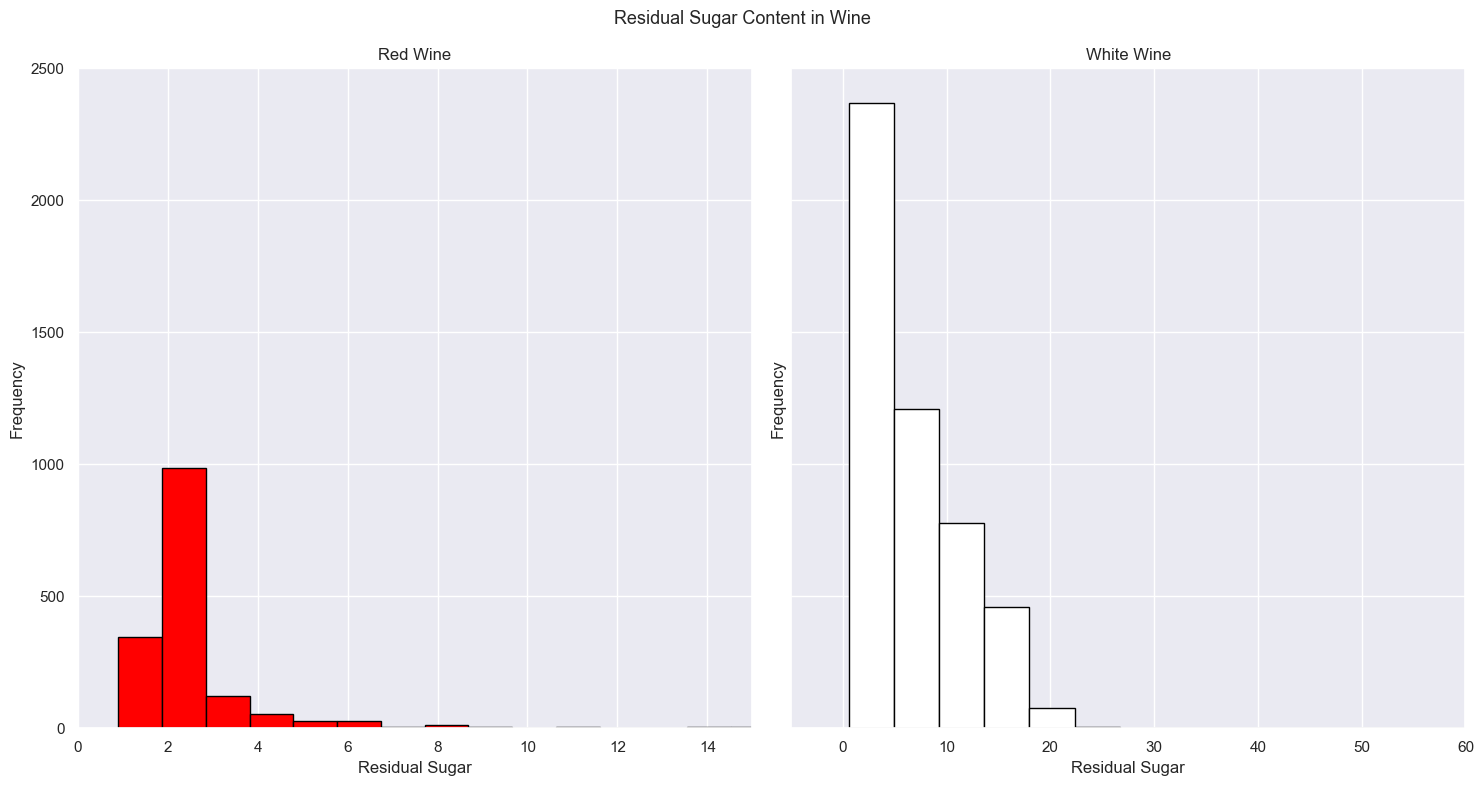

In [107]:
fig, axs = plt.subplots(1, 2, sharey="row", tight_layout=True) 

axs[0].set_title("Red Wine")
axs[1].set_title("White Wine")

axs[0].hist(red_wine['residual sugar'], color='red', bins=15,
         edgecolor='black', linewidth=1.0)
axs[1].hist(white_wine['residual sugar'], color='white', bins=15, 
         edgecolor='black', linewidth=1.0)

axs[0].set_xlabel('Residual Sugar')
axs[1].set_xlabel('Residual Sugar')
axs[0].set_ylabel('Frequency')
axs[1].set_ylabel('Frequency')
axs[0].set_xlim(0, 15)
axs[1].set_xlim(-5, 60)
axs[0].set_ylim(0, 2500)
axs[1].set_ylim(0, 2500)

rt = plt.suptitle('Residual Sugar Content in Wine', fontsize=13)

# Multivariate Analysis

<Axes: >

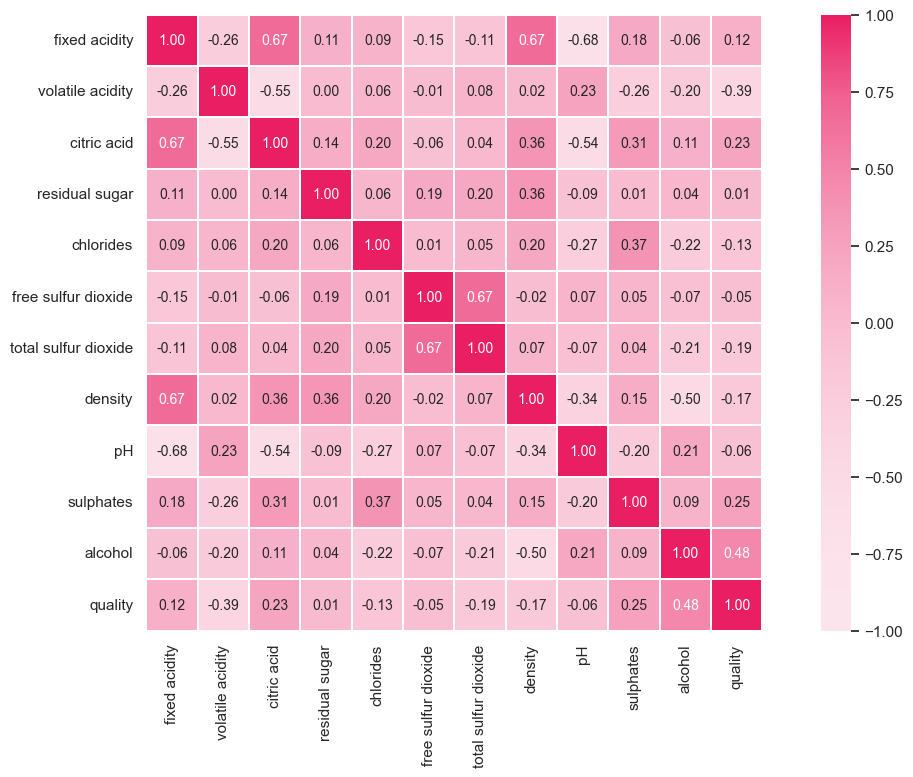

In [114]:
red_colors = ['#FCE4EC', '#F8BBD0', '#F48FB1', '#F06292', '#E91E63']
cmap = LinearSegmentedColormap.from_list('my_cmap', red_colors, gamma=2)

column_to_exclude = 'quality_label'
red_wine_subset = red_wine.drop(columns=[column_to_exclude])

corr = red_wine_subset.corr()

sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr, linewidths = 0.1, vmax = 1.0, vmin = -1.0,cmap=cmap,
           square = True, linecolor = "white", annot = True, annot_kws = {"size" : 10}, fmt=".2f")



<Axes: >

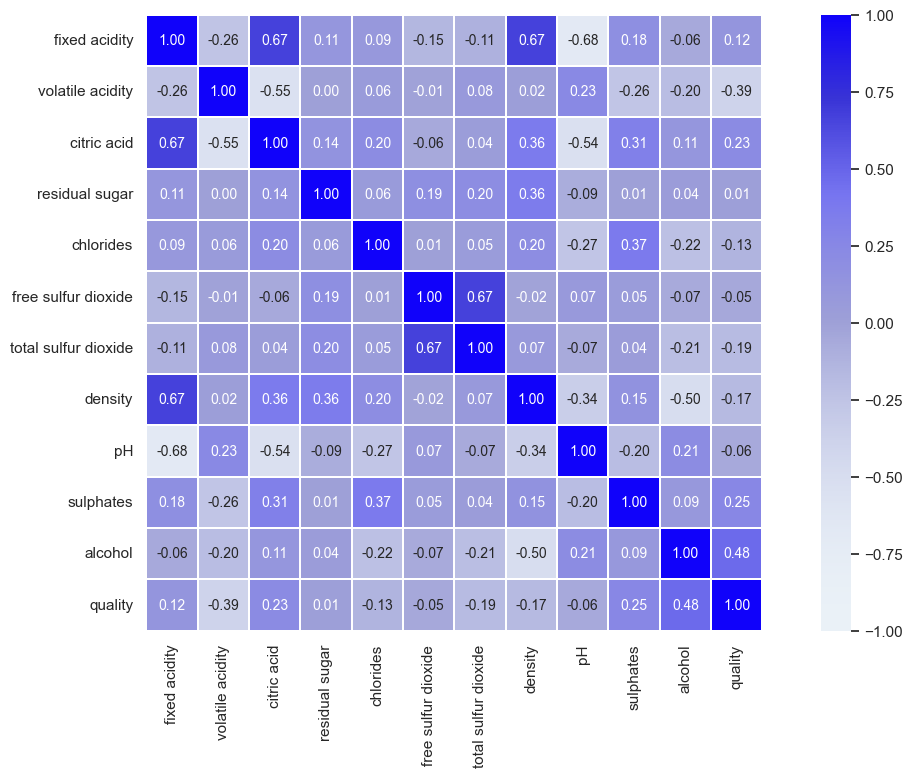

In [115]:
white_colors = ['#EAF1F7','#9EA0D7','#7775F0','#3833D6','#1002FA']
cmap = LinearSegmentedColormap.from_list('my_cmap', white_colors, gamma=2)

column_to_exclude = 'quality_label'
red_wine_subset = red_wine.drop(columns=[column_to_exclude])

corr = red_wine_subset.corr()

sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr, linewidths = 0.1, vmax = 1.0, vmin = -1.0,cmap=cmap,
           square = True, linecolor = "white", annot = True, annot_kws = {"size" : 10}, fmt=".2f")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

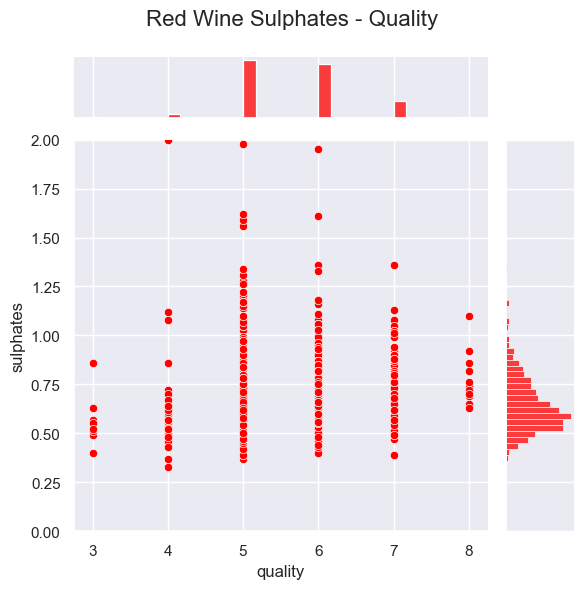

In [ ]:
sns.set(rc = {'figure.figsize':(15,10)})

sns.jointplot(data=red_wine, x='quality', y='sulphates', 
              kind="scatter", 
              height=6, 
              ratio=5, 
              space=0.2,
              dropna=False, 
              color = 'red', 
              ylim=(0,2.00))

plt.tight_layout()  
plt.suptitle("Red Wine Sulphates - Quality", fontsize=16)
plt.subplots_adjust(top=0.9)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

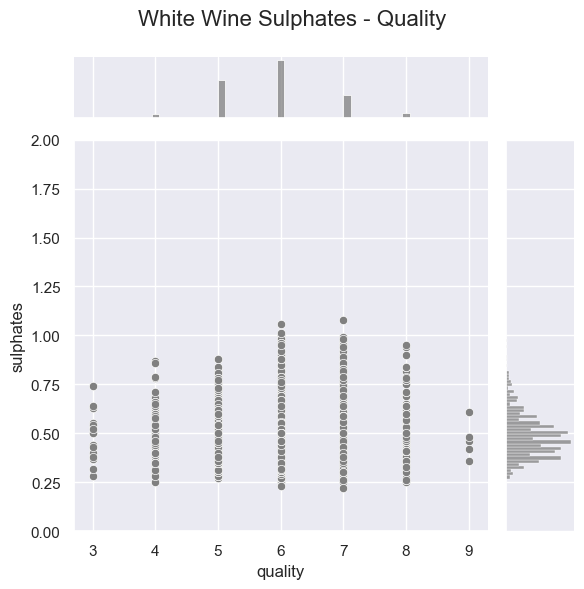

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})

sns.jointplot(data=white_wine, x='quality', y='sulphates', 
              kind="scatter", 
              height=6, 
              ratio=5, 
              space=0.2,
              dropna=False, 
              color = 'grey', 
              ylim=(0,2.00))

plt.tight_layout()  
plt.suptitle("White Wine Sulphates - Quality", fontsize=16)
plt.subplots_adjust(top=0.9)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='alcohol', ylabel='sulphates'>

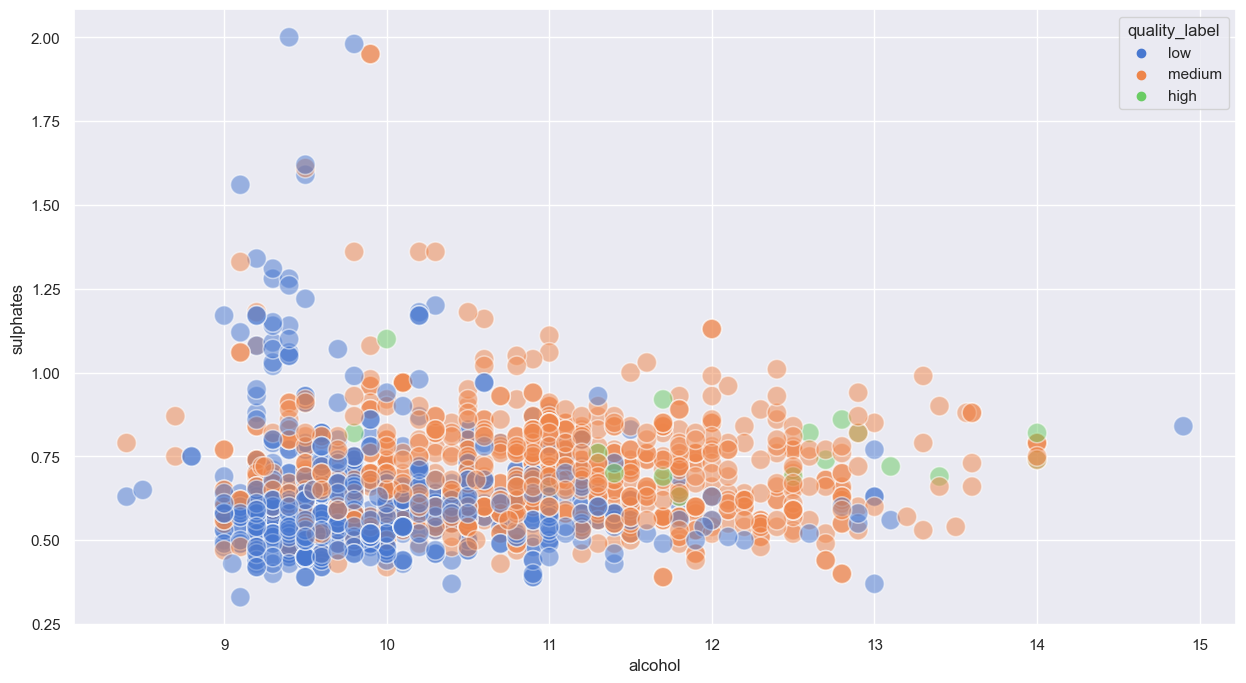

In [ ]:

red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
categories=['low', 'medium', 'high'])

white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low' 
if value <= 5 else 'medium' 
if value <= 7 else 'high')
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'], categories=['low', 'medium', 'high'])

my_color = ['red', 'green', 'blue']
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(data=red_wine, x='alcohol', y='sulphates', hue='quality_label', s=200, alpha=.5, palette="muted")